In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
# my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")

In [22]:
my_data = pd.read_csv("../data/drug200.csv", delimiter=",")

In [23]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


- LabelEncoder()
- train_test_split()
- DecisionTreeClassifier(criterion="entropy",)
- plot_tree()

In [24]:
my_data.shape

(200, 6)

In [25]:
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [26]:
my_data['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

## Exercise
Build multi-class model for decision tree and visualize trained dataset

In [27]:
# Label encoder to convert categorical variable to numerical

# my_data = my_data.apply(LabelEncoder().fit_transform)
# my_data.head()
#label encoder işlemi
LabelEncoder=LabelEncoder()
my_data['Sex']=LabelEncoder.fit_transform(my_data['Sex'])
my_data['BP']=LabelEncoder.fit_transform(my_data['BP'])
my_data['Cholesterol']=LabelEncoder.fit_transform(my_data['Cholesterol'])


In [28]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [29]:
X = my_data.drop(['Drug'], axis=1)
y = my_data["Drug"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.30,
                                                    random_state=42)

In [30]:
# Decision Tree Classifier
cart = DecisionTreeClassifier(criterion="entropy")
cart_model = cart.fit(X_train, y_train)
cart_model.get_params()

# Evaluation
accuracy = cart_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 1.0


In [31]:
# Prediction
predTree = cart_model.predict(X_test)
print(predTree)

['drugX' 'drugY' 'drugX' 'drugC' 'drugY' 'drugY' 'drugY' 'drugX' 'drugA'
 'drugX' 'drugA' 'drugX' 'drugY' 'drugA' 'drugB' 'drugY' 'drugB' 'drugX'
 'drugC' 'drugY' 'drugB' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugC'
 'drugX' 'drugY' 'drugX' 'drugY' 'drugC' 'drugC' 'drugY' 'drugA' 'drugY'
 'drugX' 'drugA' 'drugY' 'drugA' 'drugX' 'drugX' 'drugX' 'drugY' 'drugY'
 'drugC' 'drugY' 'drugY' 'drugY' 'drugX' 'drugX' 'drugY' 'drugX' 'drugY'
 'drugX' 'drugY' 'drugA' 'drugY' 'drugY' 'drugY']


In [32]:
print("\033[1m Accuracy of Decision Tree Classifier on test set:","{:.2%}".format(accuracy_score(y_test, predTree)))

 Accuracy of Decision Tree Classifier on test set: 100.00%


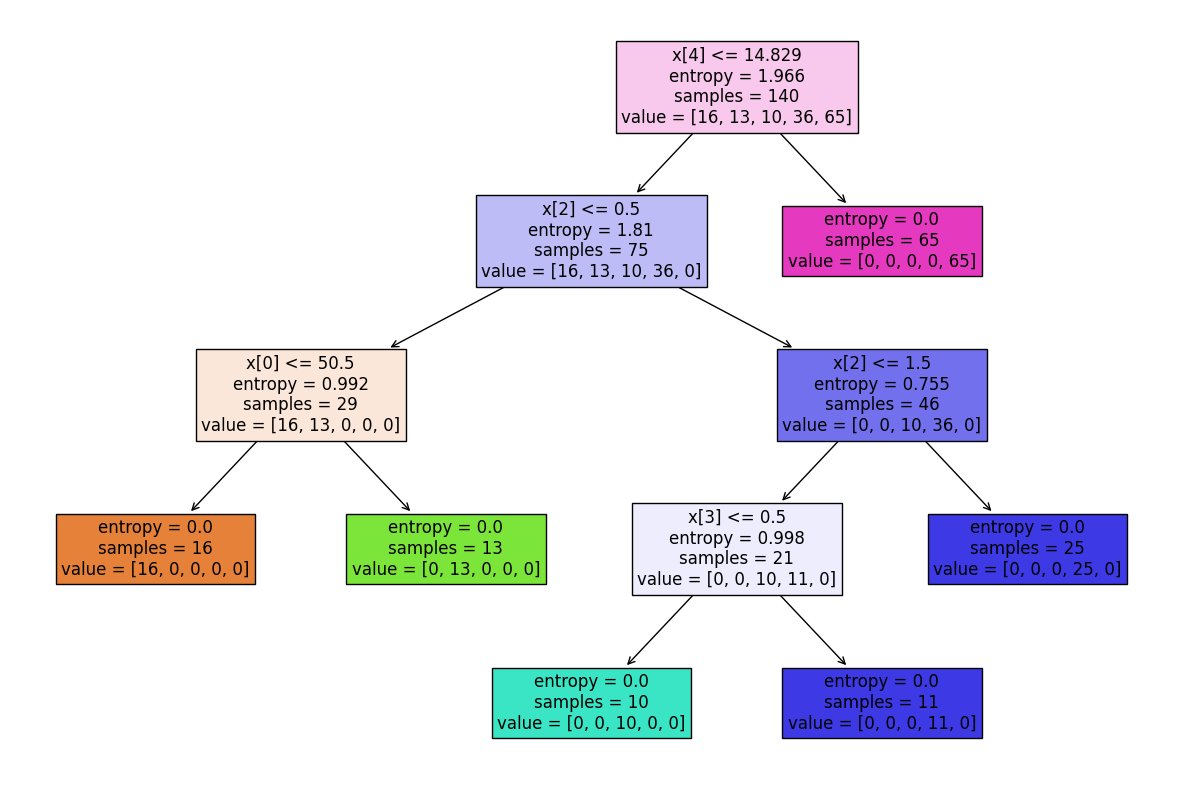

In [33]:
# plot the tree
plt.figure(figsize=(15,10))
tree.plot_tree(cart_model, filled=True, fontsize=12)
plt.show()

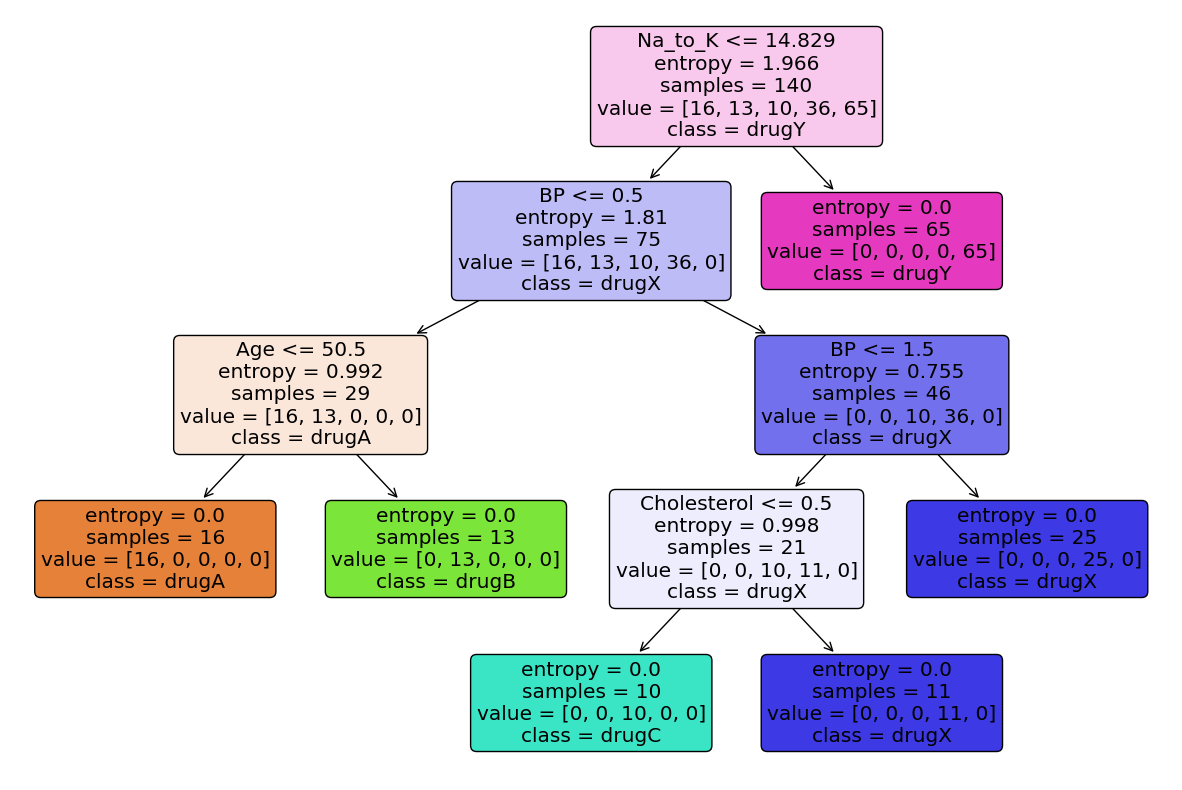

In [34]:
# plot the tree
plt.figure(figsize=(15,10))
tree.plot_tree(cart_model, filled=True, rounded=True, class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], feature_names=X.columns)
plt.show()